# English Wikipedia page views, 2008 - 2017  

### Angel Wang  

The goal of this project is to construct, analyze, and publish a dataset of monthly traffic on English Wikipedia from July 1 2008 through September 30 2017 and create a visulization of the dataset. Following are the steps for data acquisition, data processing and data analysis.
The module will then output:  
1) 5 source data files in JSON format.  
2) 1 final data file in CSV format.  
3) 1 .png image of the visualization.  

### Import Necessary Libraries

In [21]:
#import libraries
import requests
import json
from datetime import datetime
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline  

## Step 1 Data acquisition

Collect data from two different API endpoints, the Pageviews API (mobile-web, mobile-app, desktop) and the Pagecounts API (mobile-site, desktop).  
And then save the raw results into 5 separate JSON source data files (one file per API query) before continuing to step 2.

In [22]:
# Collect data from Pageviews API for mobile-web traffic data from Jul 2015 to Oct 2017.
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/anqiwang0827', 'From' : 'anqiw2@uw.edu'}
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'
            }
pageview_mobileweb_call = requests.get(endpoint.format(**params))
pageview_mobileweb = pageview_mobileweb_call.json()
pageviews_mobileweb_201507_201709 = json.dumps(pageview_mobileweb)

# Save raw data results as Json file pageviews_mobile-web_201507-201709.json
with open('pageviews_mobile-web_201507-201709.json', 'w') as file:
     json.dump(pageviews_mobileweb_201507_201709, file)

In [23]:
# Collect data from Pageviews API for mobile-app traffic data from Jul 2015 to Oct 2017.
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/anqiwang0827', 'From' : 'anqiw2@uw.edu'}
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'
            }
pageview_mobileapp_call = requests.get(endpoint.format(**params))
pageview_mobileapp = pageview_mobileapp_call.json()
pageviews_mobileapp_201507_201709 = json.dumps(pageview_mobileapp)

# Save raw data results as Json file pageviews_mobile-app_201507-201709.json
with open('pageviews_mobile-app_201507-201709.json', 'w') as file2:
     json.dump(pageviews_mobileapp_201507_201709, file2)

In [24]:
# Collect data from Pageviews API for desktop traffic data from Jul 2015 to Oct 2017.
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/anqiwang0827', 'From' : 'anqiw2@uw.edu'}
params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'
            }
pageview_desktop_call = requests.get(endpoint.format(**params))
pageview_desktop = pageview_desktop_call.json()
pageviews_desktop_201507_201709 = json.dumps(pageview_desktop)

# Save raw data results as Json file pageviews_desktop_201507-201709.json
with open('pageviews_desktop_201507-201709.json', 'w') as file3:
     json.dump(pageviews_desktop_201507_201709, file3)

In [25]:
# Collect data from Pagecounts API for mobile site traffic data from Oct 2014 to Jul 2017.
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/anqiwang0827', 'From' : 'anqiw2@uw.edu'}
params = {'project' : 'en.wikipedia.org',
            'access-site' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2014100100',
            'end' : '2016080100'
            }
pagecounts_mobile_site_call = requests.get(endpoint.format(**params))
pagecounts_mobile_site = pagecounts_mobile_site_call.json()
pagecounts_mobile_site_201410_201607 = json.dumps(pagecounts_mobile_site)

# Save raw data results as Json file pagecounts_mobile-site_201410-201607.json
with open('pagecounts_mobile-site_201410-201607.json', 'w') as file4:
     json.dump(pagecounts_mobile_site_201410_201607, file4)

In [26]:
# Collect data from Pagecounts API for desktop site traffic data from jan 2008 to Jul 2017.
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/anqiwang0827', 'From' : 'anqiw2@uw.edu'}
params = {'project' : 'en.wikipedia.org',
            'access-site' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016080100'
            }
pagecounts_desktop_site_call = requests.get(endpoint.format(**params))
pagecounts_desktop_site = pagecounts_desktop_site_call.json()
pagecounts_desktop_site_200801_201607 = json.dumps(pagecounts_desktop_site)

# Save raw data results as Json file pagecounts_desktop-site_200801-201607.json
with open('pagecounts_desktop-site_200801-201607.json', 'w') as file5:
     json.dump(pagecounts_desktop_site_200801_201607, file5)

## Step 2 Data processing

The Step 2 includes series of processing steps on these data files needed in order to prepare them for analysis. At the end of this step, a single CSV-formatted data file will be saved as en_wikipedia_traffic_200801_201709.csv.

The CSV file combined all the data from previous step with the following headers:  

Column	                (Value)   
year	                (YYYY)  
month	                (MM)  
pagecount_all_views	    (num_views)  
pagecount_desktop_views	(num_views)  
pagecount_mobile_views	(num_views)  
pageview_all_views	    (num_views)  
pageview_desktop_views	(num_views)  
pageview_mobile_views	(num_views)  


In [27]:
# get items in api raw data
df_pv_mw = pd.DataFrame(pageview_mobileweb)
df_pv_ma = pd.DataFrame(pageview_mobileapp)
df_pv_dk = pd.DataFrame(pageview_desktop)
df_pc_ms = pd.DataFrame(pagecounts_mobile_site)
df_pc_ds = pd.DataFrame(pagecounts_desktop_site)
df_pv_mw_items = df_pv_mw['items']
df_pv_ma_items = df_pv_ma['items']
df_pv_dk_items = df_pv_dk['items']
df_pc_ms_items = df_pc_ms['items']
df_pc_ds_items = df_pc_ds['items']

In [28]:
# get timestamp and views from pageview API
Temp1_pv_mw = []
Temp2_pv_mw = []
Temp3_pv_mw = []
for x in range(0,len(df_pv_mw_items)):
    Temp1_pv_mw.append(df_pv_mw['items'][x])
    Temp2_pv_mw.append(Temp1_pv_mw[x]['views'])
    Temp3_pv_mw.append(Temp1_pv_mw[x]['timestamp'])
    
Temp1_pv_ma = []
Temp2_pv_ma = []
Temp3_pv_ma = []
for x in range(0,len(df_pv_ma_items)):
    Temp1_pv_ma.append(df_pv_ma['items'][x])
    Temp2_pv_ma.append(Temp1_pv_ma[x]['views'])
    Temp3_pv_ma.append(Temp1_pv_ma[x]['timestamp'])
    
Temp1_pv_dk = []
Temp2_pv_dk = []
Temp3_pv_dk = []
for x in range(0,len(df_pv_dk_items)):
    Temp1_pv_dk.append(df_pv_dk['items'][x])
    Temp2_pv_dk.append(Temp1_pv_dk[x]['views'])
    Temp3_pv_dk.append(Temp1_pv_dk[x]['timestamp'])

In [29]:
# create pageview dataframe, add mobile traffic together
pageview_list = pd.DataFrame(
    {'Date':Temp3_pv_mw,
     'pageview_all_views': [Temp2_pv_mw[i] + Temp2_pv_ma[i] + Temp2_pv_dk[i] for i in range(len(Temp2_pv_ma))],   
     'pageview_desktop_views': Temp2_pv_dk,
     'pageview_mobile_views': [Temp2_pv_mw[i] + Temp2_pv_ma[i] for i in range(len(Temp2_pv_ma))]
    })

In [30]:
# get timestamp and counts from pagecount API
Temp1_pc_ms = []
Temp2_pc_ms = []
Temp3_pc_ms = []
for x in range(0,len(df_pc_ms_items)):
    Temp1_pc_ms.append(df_pc_ms['items'][x])
    Temp2_pc_ms.append(Temp1_pc_ms[x]['count'])
    Temp3_pc_ms.append(Temp1_pc_ms[x]['timestamp'])

Temp1_pc_ds = []
Temp2_pc_ds = []
Temp3_pc_ds = []
for x in range(0,len(df_pc_ds_items)):
    Temp1_pc_ds.append(df_pc_ds['items'][x])
    Temp2_pc_ds.append(Temp1_pc_ds[x]['count'])
    Temp3_pc_ds.append(Temp1_pc_ds[x]['timestamp'])

In [31]:
# create pagecount dataframe
pagecount_list_ms = pd.DataFrame(
    {'Date':Temp3_pc_ms,
     'pagecount_mobile_views': Temp2_pc_ms 
    })
pagecount_list_ds = pd.DataFrame(
    {'Date':Temp3_pc_ds,
     'pagecount_desktop_views': Temp2_pc_ds 
    })
pagecount_list = pagecount_list_ms.merge(pagecount_list_ds, left_on='Date', right_on='Date', how='outer')
pagecount_list['pagecount_all_views'] = pagecount_list['pagecount_mobile_views']+pagecount_list['pagecount_desktop_views']

In [32]:
# combine pagecount and pageview into one dataframe
en_wikipedia_traffic = pagecount_list.merge(pageview_list, left_on='Date', right_on='Date', how='outer')
en_wikipedia_traffic = en_wikipedia_traffic.sort(['Date'])
en_wikipedia_traffic['DateTime']= en_wikipedia_traffic['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# split Date to Year and Month
en_wikipedia_traffic_200801_201709 = en_wikipedia_traffic
en_wikipedia_traffic_200801_201709['year']=en_wikipedia_traffic_200801_201709['Date'].str[:4]
en_wikipedia_traffic_200801_201709['month']=en_wikipedia_traffic_200801_201709['Date'].str[4:6]
en_wikipedia_traffic_200801_201709 = en_wikipedia_traffic_200801_201709[['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 
'pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views']]
en_wikipedia_traffic_200801_201709 = en_wikipedia_traffic_200801_201709.fillna(0)

In [34]:
#write to csv
en_wikipedia_traffic_200801_201709.to_csv('en_wikipedia_traffic_200801_201709.csv', sep='\t',  index = False)

## Step 3 Data Processing

After creating one final dataset in Step 2. Step 3 will generate a visualization graph. The visualization will plot three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop) from both Pageviews API and Pagecounts API from Jan 2008 to Sep 2017.

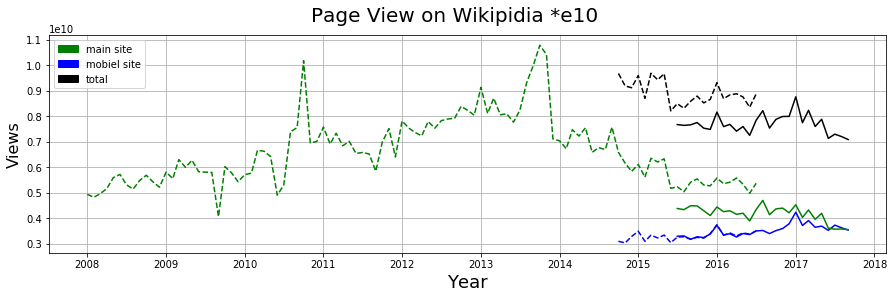

In [35]:
# Create the plot
fig, ax = plt.subplots(figsize=(15,4))
ax.plot_date(en_wikipedia_traffic['DateTime'], en_wikipedia_traffic['pagecount_all_views'], 'k--', color='black')
ax.plot_date(en_wikipedia_traffic['DateTime'], en_wikipedia_traffic['pageview_all_views'], 'k',  color='black')
ax.plot_date(en_wikipedia_traffic['DateTime'], en_wikipedia_traffic['pagecount_mobile_views'], 'k--', color='blue')
ax.plot_date(en_wikipedia_traffic['DateTime'], en_wikipedia_traffic['pagecount_desktop_views'], 'k--',color='green')
ax.plot_date(en_wikipedia_traffic['DateTime'], en_wikipedia_traffic['pageview_mobile_views'], 'k', color='blue')
ax.plot_date(en_wikipedia_traffic['DateTime'], en_wikipedia_traffic['pageview_desktop_views'], 'k', color='green')
plt.suptitle('Page View on Wikipidia *e10', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.grid(True)
black_patch = mpatches.Patch(color='black', label='total')
green_patch = mpatches.Patch(color='green', label='main site')
blue_patch = mpatches.Patch(color='blue', label='mobiel site')
plt.legend(handles=[green_patch, blue_patch,black_patch], loc='upper left')
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

In [36]:
# Save the plot
fig.savefig('Pave View on Wikipidia.png')